In [1]:
import pandas as pd
import numpy as np
import traja
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('./jaguar117/jaguar_movement_data.csv')

C:\Users\wolfb\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset.columns

Index(['Event_ID', 'timestamp', 'location.long', 'location.lat',
       'individual.taxon.canonical.name', 'tag.local.identifier',
       'individual.local.identifier (ID)', 'study.name', 'country'],
      dtype='object')

In [4]:
dataset.head()

,Event_ID,timestamp,location.long,location.lat,individual.taxon.canonical.name,tag.local.identifier,individual.local.identifier (ID),study.name,country
0,1.0,6/15/10 22:43,-58.030128,-23.326947,Panthera onca,0-333005,1,Humid Chaco,Paraguay
1,2.0,6/16/10 2:52,-58.030643,-23.328427,Panthera onca,0-333005,1,Humid Chaco,Paraguay
2,3.0,6/16/10 22:36,-58.030472,-23.327311,Panthera onca,0-333005,1,Humid Chaco,Paraguay
3,4.0,6/17/10 16:42,-58.027983,-23.309952,Panthera onca,0-333005,1,Humid Chaco,Paraguay
4,5.0,6/17/10 20:37,-58.027747,-23.310006,Panthera onca,0-333005,1,Humid Chaco,Paraguay


### We are interested only in longitude(x) and latitude(y) of individual animal


In [5]:
# Pick the trajectory of animal 5
dataset_individual_5= dataset[dataset['individual.local.identifier (ID)'] == 5]

In [6]:
dataset_individual_5.head()

,Event_ID,timestamp,location.long,location.lat,individual.taxon.canonical.name,tag.local.identifier,individual.local.identifier (ID),study.name,country
1086,1087.0,7/25/09 13:06,-58.126640,-23.348278,Panthera onca,356982,5,Humid Chaco,Paraguay
1087,1088.0,7/25/09 17:06,-58.125679,-23.349407,Panthera onca,356982,5,Humid Chaco,Paraguay
1088,1089.0,7/25/09 21:06,-58.125679,-23.348764,Panthera onca,356982,5,Humid Chaco,Paraguay
1089,1090.0,7/26/09 1:06,-58.126945,-23.347700,Panthera onca,356982,5,Humid Chaco,Paraguay
1090,1091.0,7/26/09 5:06,-58.127079,-23.347908,Panthera onca,356982,5,Humid Chaco,Paraguay


In [7]:
### Create new dataframe with x and y alone
dataset_individual_5_traj = dataset_individual_5[['location.long','location.lat']]
dataset_individual_5_traj.head()

,location.long,location.lat
1086,-58.126640,-23.348278
1087,-58.125679,-23.349407
1088,-58.125679,-23.348764
1089,-58.126945,-23.347700
1090,-58.127079,-23.347908


In [8]:
dataset_individual_5_traj.rename(columns={'location.long':'x_col',
                          'location.lat':'y_col'}, 
                 inplace=True)

C:\Users\wolfb\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
dataset_individual_5_traj.head()

,x_col,y_col
1086,-58.126640,-23.348278
1087,-58.125679,-23.349407
1088,-58.125679,-23.348764
1089,-58.126945,-23.347700
1090,-58.127079,-23.347908


### Now this is my dataset. Download it as csv and use it for trajactory analysis using traja

In [10]:
dataset_individual_5_traj.to_csv("./jaguar117/dataset_individual_5_traj.csv", encoding='utf-8')

#### Read the filtered dataset using traja 

In [11]:
df = traja.read_file('./jaguar117/dataset_individual_5_traj.csv')  # index = False for unnamed column
del df['Unnamed: 0']
df.head()

,x_col,y_col
0,-58.126640,-23.348278
1,-58.125679,-23.349407
2,-58.125679,-23.348764
3,-58.126945,-23.347700
4,-58.127079,-23.347908


In [12]:
columns = {'x_col': 'x', 'y_col': 'y'}
df = df.rename(columns=columns)

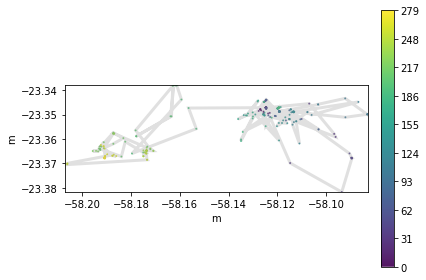

In [13]:
df.traja.plot()